In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [2]:
df1 = pd.read_csv("tmdb_5000_credits.csv")
df2 = pd.read_csv("tmdb_5000_movies.csv")

join_column_df1 = 'movie_id'
join_column_df2 = 'id'

df = pd.merge(df1, df2, left_on=join_column_df1, right_on=join_column_df2, how='inner')
df.drop(join_column_df2, axis=1, inplace=True)

df.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df['release_year'] = df['release_date'].dt.year

print(df[['release_date', 'release_year']])

     release_date  release_year
0      2009-10-12        2009.0
1      2007-05-19        2007.0
2      2015-10-26        2015.0
3      2012-07-16        2012.0
4      2012-07-03        2012.0
...           ...           ...
4798   1992-04-09        1992.0
4799   2011-12-26        2011.0
4800   2013-10-13        2013.0
4801   2012-03-05        2012.0
4802   2005-05-08        2005.0

[4803 rows x 2 columns]


In [4]:
df.dtypes

movie_id                         int64
title_x                         object
cast                            object
crew                            object
budget                           int64
genres                          object
homepage                        object
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title_y                         object
vote_average                   float64
vote_count                       int64
release_year                   float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_id              4803 non-null   int64         
 1   title_x               4803 non-null   object        
 2   cast                  4803 non-null   object        
 3   crew                  4803 non-null   object        
 4   budget                4803 non-null   int64         
 5   genres                4803 non-null   object        
 6   homepage              1712 non-null   object        
 7   keywords              4803 non-null   object        
 8   original_language     4803 non-null   object        
 9   original_title        4803 non-null   object        
 10  overview              4800 non-null   object        
 11  popularity            4803 non-null   float64       
 12  production_companies  4803 non-null   object        
 13  production_countri

In [6]:
df.isnull().sum()

movie_id                   0
title_x                    0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_y                    0
vote_average               0
vote_count                 0
release_year               1
dtype: int64

In [7]:
for column in df.columns:
    if df[column].dtype == 'object':
        mode_value = df[column].mode().iloc[0] 
        df[column] = df[column].fillna(mode_value)

In [8]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)

In [9]:
df.isnull().sum()

movie_id                0
title_x                 0
cast                    0
crew                    0
budget                  0
genres                  0
homepage                0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_y                 0
vote_average            0
vote_count              0
release_year            0
dtype: int64

In [10]:
df = df.drop('homepage', axis=1)

In [11]:
df.duplicated().sum()

0

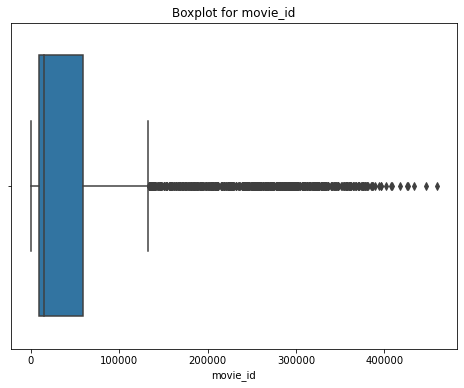

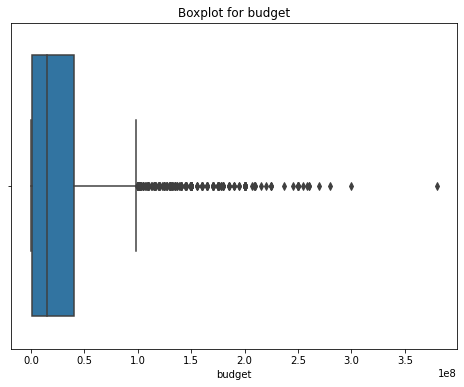

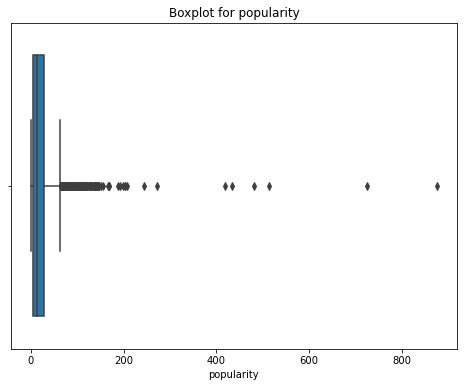

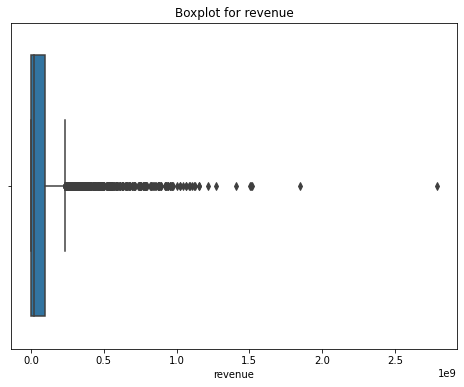

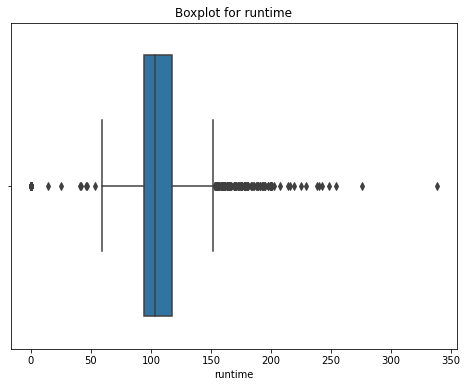

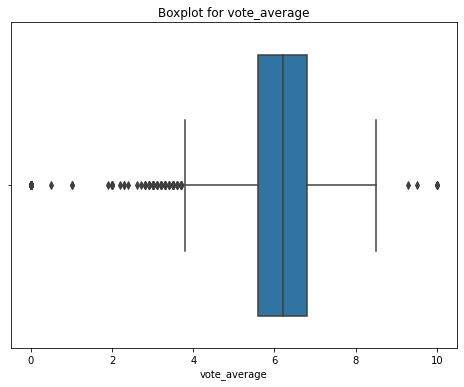

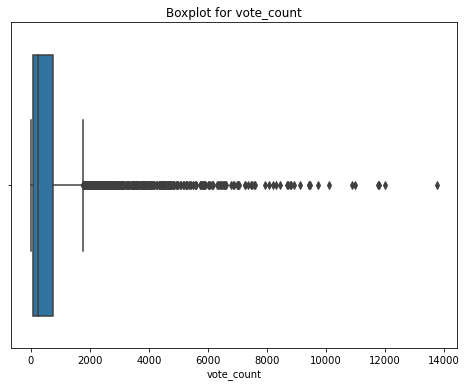

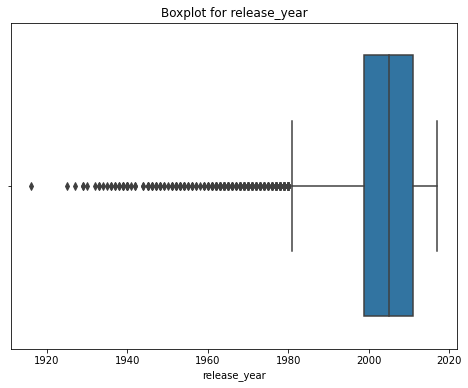

In [12]:
numeric_columns = df.select_dtypes(include='number')
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [13]:
numeric_columns.columns

Index(['movie_id', 'budget', 'popularity', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'release_year'],
      dtype='object')

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [15]:
lrceil_measure,urceil_measure=remove_outlier(df['movie_id'])
df['movie_id']=np.where(df['movie_id']>urceil_measure,urceil_measure,df['movie_id'])
df['movie_id']=np.where(df['movie_id']<lrceil_measure,lrceil_measure,df['movie_id'])

lrceil_measure,urceil_measure=remove_outlier(df['budget'])
df['budget']=np.where(df['budget']>urceil_measure,urceil_measure,df['budget'])
df['budget']=np.where(df['budget']<lrceil_measure,lrceil_measure,df['budget'])

lrceil_measure,urceil_measure=remove_outlier(df['popularity'])
df['popularity']=np.where(df['popularity']>urceil_measure,urceil_measure,df['popularity'])
df['popularity']=np.where(df['popularity']<lrceil_measure,lrceil_measure,df['popularity'])

lrceil_measure,urceil_measure=remove_outlier(df['revenue'])
df['revenue']=np.where(df['revenue']>urceil_measure,urceil_measure,df['revenue'])
df['revenue']=np.where(df['revenue']<lrceil_measure,lrceil_measure,df['revenue'])

lrceil_measure,urceil_measure=remove_outlier(df['runtime'])
df['runtime']=np.where(df['runtime']>urceil_measure,urceil_measure,df['runtime'])
df['runtime']=np.where(df['runtime']<lrceil_measure,lrceil_measure,df['runtime'])

lrceil_measure,urceil_measure=remove_outlier(df['vote_average'])
df['vote_average']=np.where(df['vote_average']>urceil_measure,urceil_measure,df['vote_average'])
df['vote_average']=np.where(df['vote_average']<lrceil_measure,lrceil_measure,df['vote_average'])

lrceil_measure,urceil_measure=remove_outlier(df['vote_count'])
df['vote_count']=np.where(df['vote_count']>urceil_measure,urceil_measure,df['vote_count'])
df['vote_count']=np.where(df['vote_count']<lrceil_measure,lrceil_measure,df['vote_count'])

lrceil_measure,urceil_measure=remove_outlier(df['release_year'])
df['release_year']=np.where(df['release_year']>urceil_measure,urceil_measure,df['release_year'])
df['release_year']=np.where(df['release_year']<lrceil_measure,lrceil_measure,df['release_year'])

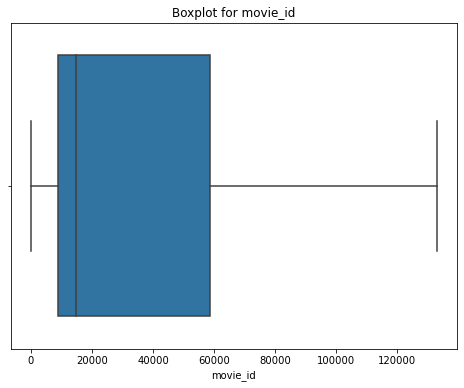

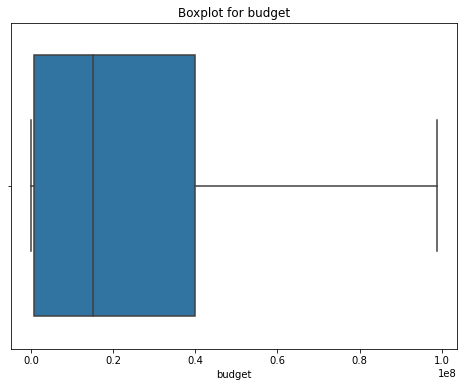

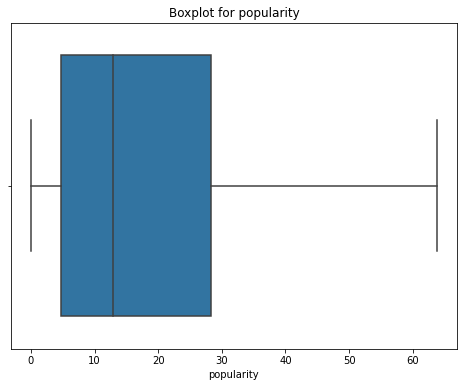

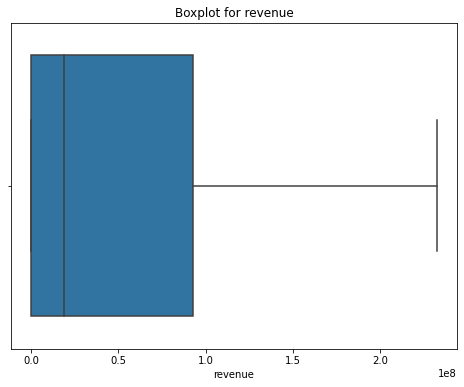

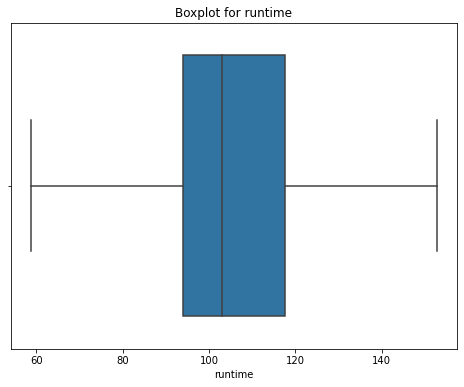

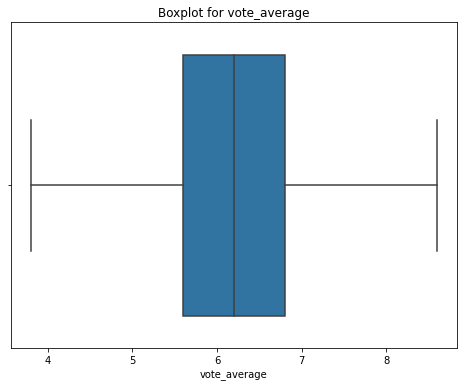

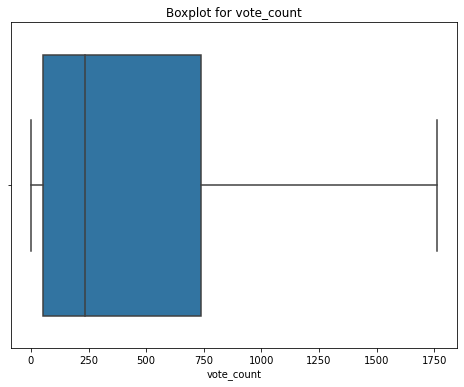

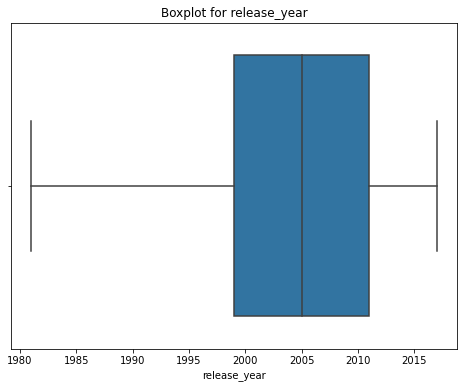

In [16]:
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [17]:
df.head(15).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
movie_id,19995.0,285.0,133004.5,49026.0,49529.0,559.0,38757.0,99861.0,767.0,133004.5,1452.0,10764.0,58.0,57201.0,49521.0
title_x,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,Superman Returns,Quantum of Solace,Pirates of the Caribbean: Dead Man's Chest,The Lone Ranger,Man of Steel
cast,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""cast_id"": 3, ""character"": ""Superman / Clark...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""cast_id"": 37, ""character"": ""Captain Jack Sp...","[{""cast_id"": 4, ""character"": ""Tonto"", ""credit_...","[{""cast_id"": 2, ""character"": ""Clark Kent / Kal..."
crew,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de...","[{""credit_id"": ""553bf23692514135c8002886"", ""de...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de...","[{""credit_id"": ""52fe43b29251416c7501aa63"", ""de...","[{""credit_id"": ""52fe4211c3a36847f8001873"", ""de...","[{""credit_id"": ""52fe4928c3a36847f818be95"", ""de...","[{""credit_id"": ""52fe4799c3a36847f813e667"", ""de..."
budget,98815000.0,98815000.0,98815000.0,98815000.0,98815000.0,98815000.0,98815000.0,98815000.0,98815000.0,98815000.0,98815000.0,98815000.0,98815000.0,98815000.0,98815000.0
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...","[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...","[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...","[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...","[{""id"": 627, ""name

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
df.columns

Index(['movie_id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title_y', 'vote_average', 'vote_count', 'release_year'],
      dtype='object')

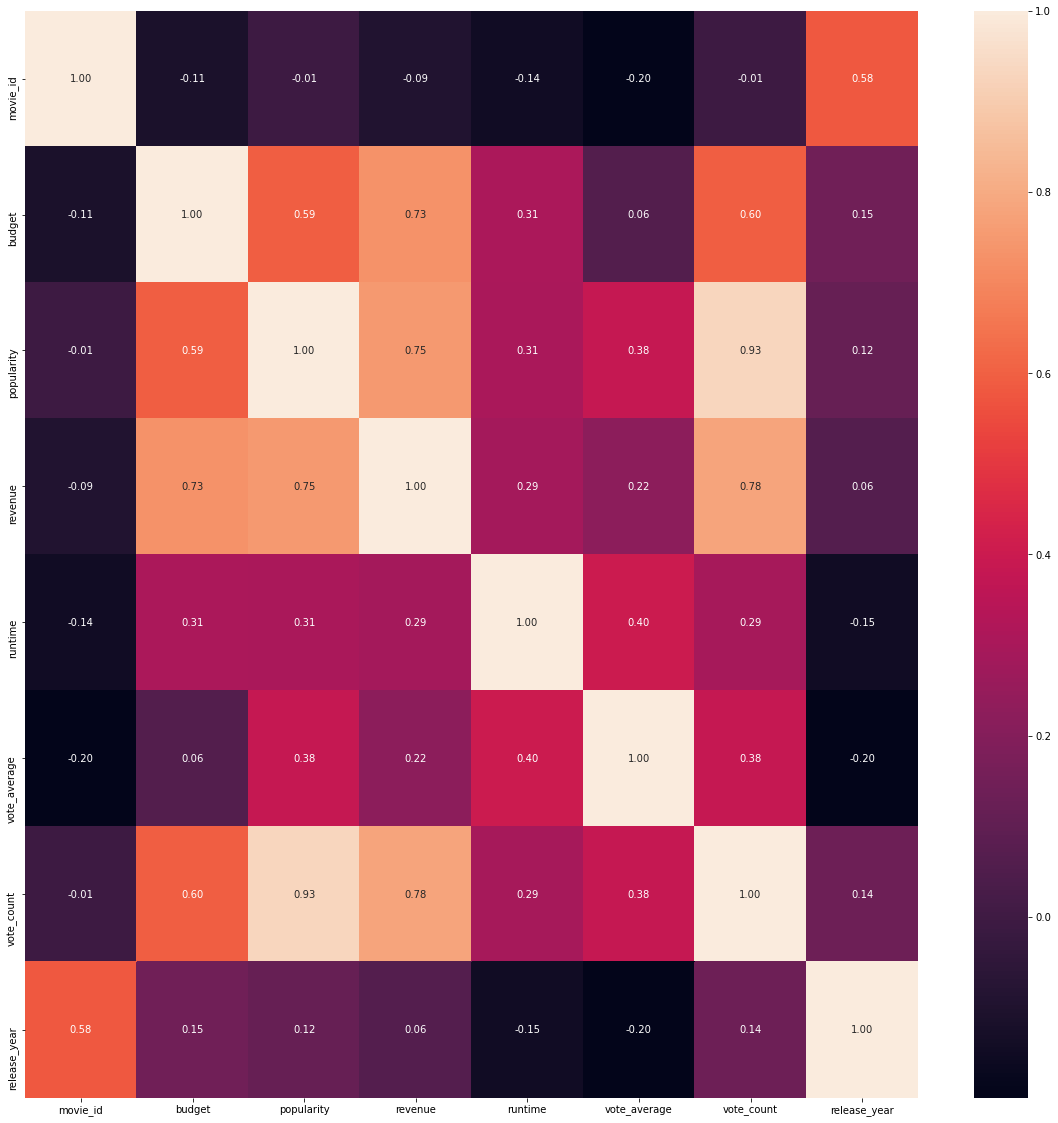

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

In [21]:
####

In [22]:
columns_to_scale = ['budget', 'revenue','vote_count'] 
data_to_scale = df[columns_to_scale]

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(data_to_scale)

# Replace the original columns with the scaled values
df[columns_to_scale] = scaled_data
df.head().transpose()

,0,1,2,3,4
movie_id,19995.0,285.0,133004.5,49026.0,49529.0
title_x,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
cast,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."
crew,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
budget,2.426755,2.426755,2.426755,2.426755,2.426755
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."


In [23]:
######

In [24]:
X=df[['budget','popularity','runtime','release_year','vote_count']]
y=df['revenue']

In [25]:
X.head().transpose()


,0,1,2,3,4
budget,2.426755,2.426755,2.426755,2.426755,2.426755
popularity,63.781656,63.781656,63.781656,63.781656,43.926995
runtime,152.750000,152.750000,148.000000,152.750000,132.000000
release_year,2009.000000,2007.000000,2015.000000,2012.000000,2012.000000
vote_count,2.174864,2.174864,2.174864,2.174864,2.174864


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(3073, 5)
(961, 5)
(769, 5)


In [28]:
X_val.head()

,budget,popularity,runtime,release_year,vote_count
479,1.801704,10.088006,87.0,2013.0,-0.627202
161,2.426755,56.257249,127.0,2016.0,1.341213
2874,-0.457314,10.536092,119.0,2003.0,-0.702911
4366,-0.822743,5.323184,92.0,2006.0,-0.754530
3018,-0.523755,22.888173,98.0,2009.0,-0.097244


In [29]:
X_test.head()

,budget,popularity,runtime,release_year,vote_count
4519,-0.855964,0.050210,120.0,2009.0,-0.819914
4084,-0.789522,1.867004,119.0,1981.0,-0.842283
3469,-0.689860,8.008844,96.0,1989.0,-0.541170
640,2.300017,31.086791,136.0,1998.0,1.179472
3132,-0.855964,1.259968,99.0,2010.0,-0.840562


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [31]:
LR1 = LinearRegression()
LR1.fit(X_train, y_train)

y_LR1_predtr= LR1.predict(X_train)
y_LR1_predvl= LR1.predict(X_val)

LR1.coef_

array([ 4.30753991e-01,  1.25263814e-03, -3.87287108e-04, -6.54757336e-03,
        5.15256176e-01])

In [32]:
LR1_trscore=r2_score(y_train,y_LR1_predtr)
LR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_LR1_predtr))
LR1_trMSE=mean_squared_error(y_train, y_LR1_predtr)
LR1_trMAE=mean_absolute_error(y_train, y_LR1_predtr)

LR1_vlscore=r2_score(y_val,y_LR1_predvl)
LR1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_LR1_predvl))
LR1_vlMSE=mean_squared_error(y_val, y_LR1_predvl)
LR1_vlMAE=mean_absolute_error(y_val, y_LR1_predvl)

Compa_df=pd.DataFrame({'Method':['Linear Reg Model1'],'Val Score':LR1_vlscore,'RMSE_vl': LR1_vlRMSE, 'MSE_vl': LR1_vlMSE, 'MAE_vl': LR1_vlMAE,'train Score':LR1_trscore,'RMSE_tr': LR1_trRMSE, 'MSE_tr': LR1_trMSE, 'MAE_tr': LR1_trMAE})



Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.707936,0.541081,0.292768,0.361719,0.741511,0.509406,0.259495,0.33886


In [33]:
Lasso1 = Lasso(alpha=1)
Lasso1.fit(X_train, y_train)


y_Lasso1_predtr= Lasso1.predict(X_train)
y_Lasso1_predvl= Lasso1.predict(X_val)


In [34]:
Lasso1_trscore=r2_score(y_train,y_Lasso1_predtr)
Lasso1_trRMSE=np.sqrt(mean_squared_error(y_train, y_Lasso1_predtr))
Lasso1_trMSE=mean_squared_error(y_train, y_Lasso1_predtr)
Lasso1_trMAE=mean_absolute_error(y_train, y_Lasso1_predtr)

Lasso1_vlscore=r2_score(y_val,y_Lasso1_predvl)
Lasso1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_Lasso1_predvl))
Lasso1_vlMSE=mean_squared_error(y_val, y_Lasso1_predvl)
Lasso1_vlMAE=mean_absolute_error(y_val, y_Lasso1_predvl)

Lasso1_df=pd.DataFrame({'Method':['Linear-Reg Lasso1'],'Val Score':Lasso1_vlscore,'RMSE_vl': Lasso1_vlRMSE, 'MSE_vl': Lasso1_vlMSE, 'MAE_vl': Lasso1_vlMAE,'train Score':Lasso1_trscore,'RMSE_tr': Lasso1_trRMSE, 'MSE_tr': Lasso1_trMSE, 'MAE_tr': Lasso1_trMAE})
Compa_df = pd.concat([Compa_df, Lasso1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.707936,0.541081,0.292768,0.361719,0.741511,0.509406,0.259495,0.338860
0,Linear-Reg Lasso1,0.556318,0.666897,0.444751,0.467300,0.563838,0.661709,0.437859,0.457236


In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
knn1 = KNeighborsRegressor(n_neighbors=4,weights='distance')
knn1.fit(X_train, y_train)


y_knn1_predtr= knn1.predict(X_train)
y_knn1_predvl= knn1.predict(X_val)

In [37]:
knn1_trscore=r2_score(y_train,y_knn1_predtr)
knn1_trRMSE=np.sqrt(mean_squared_error(y_train, y_knn1_predtr))
knn1_trMSE=mean_squared_error(y_train, y_knn1_predtr)
knn1_trMAE=mean_absolute_error(y_train, y_knn1_predtr)

knn1_vlscore=r2_score(y_val,y_knn1_predvl)
knn1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_knn1_predvl))
knn1_vlMSE=mean_squared_error(y_val, y_knn1_predvl)
knn1_vlMAE=mean_absolute_error(y_val, y_knn1_predvl)

knn1_df=pd.DataFrame({'Method':['knn1'],'Val Score':knn1_vlscore,'RMSE_vl': knn1_vlRMSE, 'MSE_vl': knn1_vlMSE, 'MAE_vl': knn1_vlMAE,'train Score':knn1_trscore,'RMSE_tr': knn1_trRMSE, 'MSE_tr': knn1_trMSE, 'MAE_tr': knn1_trMAE})
Compa_df = pd.concat([Compa_df, knn1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.707936,0.541081,0.292768,0.361719,0.741511,0.509406,0.259495,0.338860
0,Linear-Reg Lasso1,0.556318,0.666897,0.444751,0.467300,0.563838,0.661709,0.437859,0.457236
0,knn1,0.560022,0.664107,0.441038,0.415238,0.999551,0.021233,0.000451,0.000830


In [38]:
from sklearn.svm import SVR

In [39]:
SVR1 = SVR(gamma='auto',C=10.0, epsilon=0.2,kernel='rbf')
SVR1.fit(X_train, y_train)

y_SVR1_predtr= SVR1.predict(X_train)
y_SVR1_predvl= SVR1.predict(X_val)

In [40]:
SVR1_trscore=r2_score(y_train,y_SVR1_predtr)
SVR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_SVR1_predtr))
SVR1_trMSE=mean_squared_error(y_train, y_SVR1_predtr)
SVR1_trMAE=mean_absolute_error(y_train, y_SVR1_predtr)

SVR1_vlscore=r2_score(y_val,y_SVR1_predvl)
SVR1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_SVR1_predvl))
SVR1_vlMSE=mean_squared_error(y_val, y_SVR1_predvl)
SVR1_vlMAE=mean_absolute_error(y_val, y_SVR1_predvl)

SVR1_df=pd.DataFrame({'Method':['SVR1'],'Val Score':SVR1_vlscore,'RMSE_vl': SVR1_vlRMSE, 'MSE_vl': SVR1_vlMSE, 'MAE_vl': SVR1_vlMAE,'train Score':SVR1_trscore,'RMSE_tr': SVR1_trRMSE, 'MSE_tr': SVR1_trMSE, 'MAE_tr': SVR1_trMAE})
Compa_df = pd.concat([Compa_df, SVR1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.707936,0.541081,0.292768,0.361719,0.741511,0.509406,0.259495,0.338860
0,Linear-Reg Lasso1,0.556318,0.666897,0.444751,0.467300,0.563838,0.661709,0.437859,0.457236
0,knn1,0.560022,0.664107,0.441038,0.415238,0.999551,0.021233,0.000451,0.000830
0,SVR1,0.446773,0.744688,0.554560,0.566039,0.965156,0.187027,0.034979,0.180768


In [41]:
SVR2 = SVR(gamma='auto',C=0.1,kernel='linear')
SVR2.fit(X_train, y_train)

y_SVR2_predtr= SVR2.predict(X_train)
y_SVR2_predvl= SVR2.predict(X_val)

In [42]:
SVR2_trscore=r2_score(y_train,y_SVR2_predtr)
SVR2_trRMSE=np.sqrt(mean_squared_error(y_train, y_SVR2_predtr))
SVR2_trMSE=mean_squared_error(y_train, y_SVR2_predtr)
SVR2_trMAE=mean_absolute_error(y_train, y_SVR2_predtr)

SVR2_vlscore=r2_score(y_val,y_SVR2_predvl)
SVR2_vlRMSE=np.sqrt(mean_squared_error(y_val, y_SVR2_predvl))
SVR2_vlMSE=mean_squared_error(y_val, y_SVR2_predvl)
SVR2_vlMAE=mean_absolute_error(y_val, y_SVR2_predvl)

SVR2_df=pd.DataFrame({'Method':['SVR2'],'Val Score':SVR2_vlscore,'RMSE_vl': SVR2_vlRMSE, 'MSE_vl': SVR2_vlMSE, 'MAE_vl': SVR2_vlMAE,'train Score':SVR2_trscore,'RMSE_tr': SVR2_trRMSE, 'MSE_tr': SVR2_trMSE, 'MAE_tr': SVR2_trMAE})
Compa_df = pd.concat([Compa_df, SVR2_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.707936,0.541081,0.292768,0.361719,0.741511,0.509406,0.259495,0.338860
0,Linear-Reg Lasso1,0.556318,0.666897,0.444751,0.467300,0.563838,0.661709,0.437859,0.457236
0,knn1,0.560022,0.664107,0.441038,0.415238,0.999551,0.021233,0.000451,0.000830
0,SVR1,0.446773,0.744688,0.554560,0.566039,0.965156,0.187027,0.034979,0.180768
0,SVR2,0.693183,0.554578,0.307557,0.386349,0.722269,0.528026,0.278812,0.369511


In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
DT1 = DecisionTreeRegressor()
DT1.fit(X_train, y_train)

y_DT1_predtr= DT1.predict(X_train)
y_DT1_predvl= DT1.predict(X_val)

In [45]:
DT1_trscore=r2_score(y_train,y_DT1_predtr)
DT1_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT1_predtr))
DT1_trMSE=mean_squared_error(y_train, y_DT1_predtr)
DT1_trMAE=mean_absolute_error(y_train, y_DT1_predtr)

DT1_vlscore=r2_score(y_val,y_DT1_predvl)
DT1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_DT1_predvl))
DT1_vlMSE=mean_squared_error(y_val, y_DT1_predvl)
DT1_vlMAE=mean_absolute_error(y_val, y_DT1_predvl)

DT1_df=pd.DataFrame({'Method':['DT1'],'Val Score':DT1_vlscore,'RMSE_vl': DT1_vlRMSE, 'MSE_vl': DT1_vlMSE, 'MAE_vl': DT1_vlMAE,'train Score':DT1_trscore,'RMSE_tr': DT1_trRMSE, 'MSE_tr': DT1_trMSE, 'MAE_tr': DT1_trMAE})
Compa_df = pd.concat([Compa_df, DT1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.707936,0.541081,0.292768,0.361719,0.741511,0.509406,0.259495,0.338860
0,Linear-Reg Lasso1,0.556318,0.666897,0.444751,0.467300,0.563838,0.661709,0.437859,0.457236
0,knn1,0.560022,0.664107,0.441038,0.415238,0.999551,0.021233,0.000451,0.000830
0,SVR1,0.446773,0.744688,0.554560,0.566039,0.965156,0.187027,0.034979,0.180768
0,SVR2,0.693183,0.554578,0.307557,0.386349,0.722269,0.528026,0.278812,0.369511
0,DT1,0.504555,0.704727,0.496640,0.410607,0.999551,0.021233,0.000451,0.000830


In [46]:
DT2 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=5)
DT2.fit(X_train, y_train)

y_DT2_predtr= DT2.predict(X_train)
y_DT2_predvl= DT2.predict(X_val)

In [47]:
DT2_trscore=r2_score(y_train,y_DT2_predtr)
DT2_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT2_predtr))
DT2_trMSE=mean_squared_error(y_train, y_DT2_predtr)
DT2_trMAE=mean_absolute_error(y_train, y_DT2_predtr)

DT2_vlscore=r2_score(y_val,y_DT2_predvl)
DT2_vlRMSE=np.sqrt(mean_squared_error(y_val, y_DT2_predvl))
DT2_vlMSE=mean_squared_error(y_val, y_DT2_predvl)
DT2_vlMAE=mean_absolute_error(y_val, y_DT2_predvl)

DT2_df=pd.DataFrame({'Method':['DT2'],'Val Score':DT2_vlscore,'RMSE_vl': DT2_vlRMSE, 'MSE_vl': DT2_vlMSE, 'MAE_vl': DT2_vlMAE,'train Score':DT2_trscore,'RMSE_tr': DT2_trRMSE, 'MSE_tr': DT2_trMSE, 'MAE_tr': DT2_trMAE})
Compa_df = pd.concat([Compa_df, DT2_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.707936,0.541081,0.292768,0.361719,0.741511,0.509406,0.259495,0.338860
0,Linear-Reg Lasso1,0.556318,0.666897,0.444751,0.467300,0.563838,0.661709,0.437859,0.457236
0,knn1,0.560022,0.664107,0.441038,0.415238,0.999551,0.021233,0.000451,0.000830
0,SVR1,0.446773,0.744688,0.554560,0.566039,0.965156,0.187027,0.034979,0.180768
0,SVR2,0.693183,0.554578,0.307557,0.386349,0.722269,0.528026,0.278812,0.369511
0,DT1,0.504555,0.704727,0.496640,0.410607,0.999551,0.021233,0.000451,0.000830
0,DT2,0.640267,0.600500,0.360601,0.354944,0.870982,0.359889,0.129520,0.213567


In [48]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [49]:
GB1=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22)
GB1.fit(X_train, y_train)

y_GB1_predtr= GB1.predict(X_train)
y_GB1_predvl= GB1.predict(X_val)

In [50]:
GB1_trscore=r2_score(y_train,y_GB1_predtr)
GB1_trRMSE=np.sqrt(mean_squared_error(y_train, y_GB1_predtr))
GB1_trMSE=mean_squared_error(y_train, y_GB1_predtr)
GB1_trMAE=mean_absolute_error(y_train, y_GB1_predtr)

GB1_vlscore=r2_score(y_val,y_GB1_predvl)
GB1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_GB1_predvl))
GB1_vlMSE=mean_squared_error(y_val, y_GB1_predvl)
GB1_vlMAE=mean_absolute_error(y_val, y_GB1_predvl)

GB1_df=pd.DataFrame({'Method':['GB1'],'Val Score':GB1_vlscore,'RMSE_vl': GB1_vlRMSE, 'MSE_vl': GB1_vlMSE, 'MAE_vl': GB1_vlMAE,'train Score':GB1_trscore,'RMSE_tr': GB1_trRMSE, 'MSE_tr': GB1_trMSE, 'MAE_tr': GB1_trMAE})
Compa_df = pd.concat([Compa_df, GB1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.707936,0.541081,0.292768,0.361719,0.741511,0.509406,0.259495,0.338860
0,Linear-Reg Lasso1,0.556318,0.666897,0.444751,0.467300,0.563838,0.661709,0.437859,0.457236
0,knn1,0.560022,0.664107,0.441038,0.415238,0.999551,0.021233,0.000451,0.000830
0,SVR1,0.446773,0.744688,0.554560,0.566039,0.965156,0.187027,0.034979,0.180768
0,SVR2,0.693183,0.554578,0.307557,0.386349,0.722269,0.528026,0.278812,0.369511
0,DT1,0.504555,0.704727,0.496640,0.410607,0.999551,0.021233,0.000451,0.000830
0,DT2,0.640267,0.600500,0.360601,0.354944,0.870982,0.359889,0.129520,0.213567
0,GB1,0.740459,0.510065,0.260167,0.323148,0.859126,0.376061,0.141422,0.242263


In [51]:
BGG1=BaggingRegressor(n_estimators=50, oob_score= True,random_state=14)
BGG1.fit(X_train, y_train)

y_BGG1_predtr= BGG1.predict(X_train)
y_BGG1_predvl= BGG1.predict(X_val)

In [52]:
BGG1_trscore=r2_score(y_train,y_BGG1_predtr)
BGG1_trRMSE=np.sqrt(mean_squared_error(y_train, y_BGG1_predtr))
BGG1_trMSE=mean_squared_error(y_train, y_BGG1_predtr)
BGG1_trMAE=mean_absolute_error(y_train, y_BGG1_predtr)

BGG1_vlscore=r2_score(y_val,y_BGG1_predvl)
BGG1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_BGG1_predvl))
BGG1_vlMSE=mean_squared_error(y_val, y_BGG1_predvl)
BGG1_vlMAE=mean_absolute_error(y_val, y_BGG1_predvl)

BGG1_df=pd.DataFrame({'Method':['BGG1'],'Val Score':BGG1_vlscore,'RMSE_vl': BGG1_vlRMSE, 'MSE_vl':BGG1_vlMSE, 'MAE_vl': BGG1_vlMAE,'train Score':BGG1_trscore,'RMSE_tr': BGG1_trRMSE, 'MSE_tr': BGG1_trMSE, 'MAE_tr': BGG1_trMAE})
Compa_df = pd.concat([Compa_df, BGG1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.707936,0.541081,0.292768,0.361719,0.741511,0.509406,0.259495,0.338860
0,Linear-Reg Lasso1,0.556318,0.666897,0.444751,0.467300,0.563838,0.661709,0.437859,0.457236
0,knn1,0.560022,0.664107,0.441038,0.415238,0.999551,0.021233,0.000451,0.000830
0,SVR1,0.446773,0.744688,0.554560,0.566039,0.965156,0.187027,0.034979,0.180768
0,SVR2,0.693183,0.554578,0.307557,0.386349,0.722269,0.528026,0.278812,0.369511
0,DT1,0.504555,0.704727,0.496640,0.410607,0.999551,0.021233,0.000451,0.000830
0,DT2,0.640267,0.600500,0.360601,0.354944,0.870982,0.359889,0.129520,0.213567
0,GB1,0.740459,0.510065,0.260167,0.323148,0.859126,0.376061,0.141422,0.242263
0,BGG1,0.717250,0.532383,0.283432,0.328390,0.963269,0.192025,0.036874,0.116660


In [53]:
result_dff=pd.DataFrame()

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [55]:
def feat_imp(model,X_data_set):
    imp_feature_1=pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_data_set.columns)
    imp_feature_1=imp_feature_1.sort_values(by="Imp",ascending=False)
    print(imp_feature_1)
    
    
    plt.figure(figsize=(10,10))
    imp_feature_1[:30].plot.bar(figsize=(15,5))

   
    print("\nFirst 8 feature importance:\t",(imp_feature_1[:8].sum())*100)
    print("\nFirst 12 feature importance:\t",(imp_feature_1[:12].sum())*100)

In [56]:
def result (model,pipe_model,X_train_set,y_train_set,X_val_set,y_val_set):
    pipe_model.fit(X_train_set,y_train_set)
 
    y_train_predict= pipe_model.predict(X_train_set)
    y_val_predict= pipe_model.predict(X_val_set)

    trscore=r2_score(y_train_set,y_train_predict)
    trRMSE=np.sqrt(mean_squared_error(y_train_set,y_train_predict))
    trMSE=mean_squared_error(y_train_set,y_train_predict)
    trMAE=mean_absolute_error(y_train_set,y_train_predict)

    vlscore=r2_score(y_val,y_val_predict)
    vlRMSE=np.sqrt(mean_squared_error(y_val,y_val_predict))
    vlMSE=mean_squared_error(y_val,y_val_predict)
    vlMAE=mean_absolute_error(y_val,y_val_predict)
    result_df=pd.DataFrame({'Method':[model],'val score':vlscore,'RMSE_val':vlRMSE,'MSE_val':vlMSE,'MAE_vl': vlMAE,
                          'train Score':trscore,'RMSE_tr': trRMSE,'MSE_tr': trMSE, 'MAE_tr': trMAE})
    
    return result_df

In [57]:
clf=XGBRegressor(objective='reg:squarederror',random_state=6)
pipe_XGB_1=Pipeline([('XGB1',clf)])
result_dff=pd.concat([result_dff,result('XGB1',pipe_XGB_1,X_train,y_train,X_val,y_val)])
result_dff

,Method,val score,RMSE_val,MSE_val,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,XGB1,0.695645,0.552348,0.305088,0.337813,0.985216,0.121825,0.014841,0.079141


                   Imp
vote_count    0.673570
budget        0.163173
release_year  0.069541
runtime       0.050864
popularity    0.042852

First 8 feature importance:	 Imp    100.0
dtype: float32

First 12 feature importance:	 Imp    100.0
dtype: float32


<Figure size 720x720 with 0 Axes>

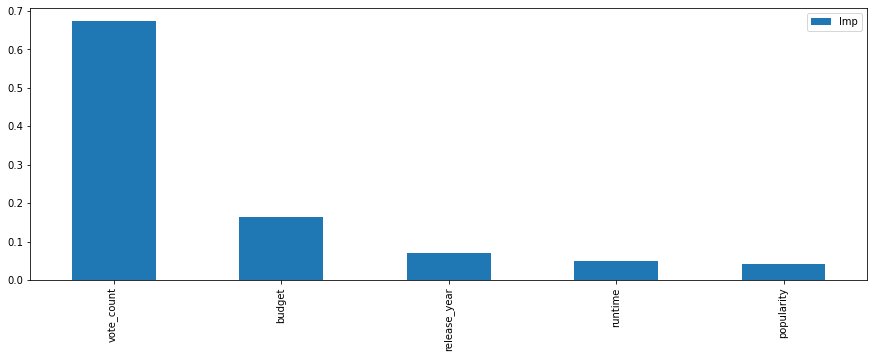

In [58]:
feat_imp(clf,X_train)

In [59]:
clf=XGBRegressor(n_estimators=150,max_depth=5,random_state=7)
pipe_XGB_2=Pipeline([('XGB2',clf)])
result_dff=pd.concat([result_dff,result('XGB2',pipe_XGB_2,X_train,y_train,X_val,y_val)])
result_dff

,Method,val score,RMSE_val,MSE_val,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,XGB1,0.695645,0.552348,0.305088,0.337813,0.985216,0.121825,0.014841,0.079141
0,XGB2,0.694412,0.553466,0.306325,0.341494,0.980770,0.138941,0.019305,0.090759


In [60]:
clf= AdaBoostRegressor(DecisionTreeRegressor(random_state=8))
pipe_ADAB_1=Pipeline([('ADAB1',clf)])
result_dff=pd.concat([result_dff,result('ADAB1',pipe_ADAB_1,X_train,y_train,X_val,y_val)])
result_dff

,Method,val score,RMSE_val,MSE_val,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,XGB1,0.695645,0.552348,0.305088,0.337813,0.985216,0.121825,0.014841,0.079141
0,XGB2,0.694412,0.553466,0.306325,0.341494,0.980770,0.138941,0.019305,0.090759
0,ADAB1,0.670679,0.574557,0.330115,0.328521,0.997354,0.051539,0.002656,0.016213


In [61]:
clf= AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),n_estimators=250,learning_rate=0.005,random_state=9)
pipe_ADAB_2=Pipeline([('ADAB2',clf)])
result_dff=pd.concat([result_dff,result('ADAB2',pipe_ADAB_2,X_train,y_train,X_val,y_val)])
result_dff

,Method,val score,RMSE_val,MSE_val,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,XGB1,0.695645,0.552348,0.305088,0.337813,0.985216,0.121825,0.014841,0.079141
0,XGB2,0.694412,0.553466,0.306325,0.341494,0.980770,0.138941,0.019305,0.090759
0,ADAB1,0.670679,0.574557,0.330115,0.328521,0.997354,0.051539,0.002656,0.016213
0,ADAB2,0.665225,0.579294,0.335582,0.327549,0.999544,0.021407,0.000458,0.000859


In [62]:
RF1=RandomForestRegressor()
RF1.fit(X_train, y_train)

y_RF1_predtr= RF1.predict(X_train)
y_RF1_predvl= RF1.predict(X_val)

In [63]:
RF1_trscore=r2_score(y_train,y_RF1_predtr)
RF1_trRMSE=np.sqrt(mean_squared_error(y_train, y_RF1_predtr))
RF1_trMSE=mean_squared_error(y_train, y_RF1_predtr)
RF1_trMAE=mean_absolute_error(y_train, y_RF1_predtr)

RF1_vlscore=r2_score(y_val,y_RF1_predvl)
RF1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_RF1_predvl))
RF1_vlMSE=mean_squared_error(y_val, y_RF1_predvl)
RF1_vlMAE=mean_absolute_error(y_val, y_RF1_predvl)

RF1_df=pd.DataFrame({'Method':['RF1'],'Val Score':RF1_vlscore,'RMSE_vl': RF1_vlRMSE, 'MSE_vl':RF1_vlMSE, 'MAE_vl': RF1_vlMAE,'train Score':RF1_trscore,'RMSE_tr': RF1_trRMSE, 'MSE_tr': RF1_trMSE, 'MAE_tr': RF1_trMAE})
Compa_df = pd.concat([Compa_df, RF1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.707936,0.541081,0.292768,0.361719,0.741511,0.509406,0.259495,0.338860
0,Linear-Reg Lasso1,0.556318,0.666897,0.444751,0.467300,0.563838,0.661709,0.437859,0.457236
0,knn1,0.560022,0.664107,0.441038,0.415238,0.999551,0.021233,0.000451,0.000830
0,SVR1,0.446773,0.744688,0.554560,0.566039,0.965156,0.187027,0.034979,0.180768
0,SVR2,0.693183,0.554578,0.307557,0.386349,0.722269,0.528026,0.278812,0.369511
0,DT1,0.504555,0.704727,0.496640,0.410607,0.999551,0.021233,0.000451,0.000830
0,DT2,0.640267,0.600500,0.360601,0.354944,0.870982,0.359889,0.129520,0.213567
0,GB1,0.740459,0.510065,0.260167,0.323148,0.859126,0.376061,0.141422,0.242263
0,BGG1,0.717250,0.532383,0.283432,0.328390,0.963269,0.192025,0.036874,0.116660
0,RF1,0.719086,0.530652,0.281591,0.329837,0.964003,0.190097,0.036137,0.115275


In [64]:
from sklearn.pipeline import Pipeline

In [65]:
def result (model,pipe_model,X_train_set,y_train_set,X_val_set,y_val_set):
    pipe_model.fit(X_train_set,y_train_set)
   
    y_train_predict= pipe_model.predict(X_train_set)
    y_val_predict= pipe_model.predict(X_val_set)

    trscore=r2_score(y_train_set,y_train_predict)
    trRMSE=np.sqrt(mean_squared_error(y_train_set,y_train_predict))
    trMSE=mean_squared_error(y_train_set,y_train_predict)
    trMAE=mean_absolute_error(y_train_set,y_train_predict)

    vlscore=r2_score(y_val,y_val_predict)
    vlRMSE=np.sqrt(mean_squared_error(y_val,y_val_predict))
    vlMSE=mean_squared_error(y_val,y_val_predict)
    vlMAE=mean_absolute_error(y_val,y_val_predict)
    result_df=pd.DataFrame({'Method':[model],'val score':vlscore,'RMSE_val':vlRMSE,'MSE_val':vlMSE,'MAE_vl':vlMAE ,
                          'train Score':trscore,'RMSE_tr': trRMSE,'MSE_tr': trMSE, 'MAE_tr': trMAE})  
    return result_df

In [66]:
result_dff=pd.DataFrame()
pipe_LR = Pipeline([('LR', LinearRegression())])
result_dff=pd.concat([result_dff,result('LR',pipe_LR,X_train,y_train,X_val,y_val)])

pipe_knr = Pipeline([('KNNR', KNeighborsRegressor(n_neighbors=4,weights='distance'))])
result_dff=pd.concat([result_dff,result('KNNR',pipe_knr,X_train,y_train,X_val,y_val)])

pipe_DTR = Pipeline([('DTR', DecisionTreeRegressor())])
result_dff=pd.concat([result_dff,result('DTR',pipe_DTR,X_train,y_train,X_val,y_val)])

pipe_GBR = Pipeline([('GBR', GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22))])
result_dff=pd.concat([result_dff,result('GBR',pipe_GBR,X_train,y_train,X_val,y_val)])

pipe_BGR = Pipeline([('BGR', BaggingRegressor(n_estimators=50, oob_score= True,random_state=14))])
result_dff=pd.concat([result_dff,result('BGR',pipe_BGR,X_train,y_train,X_val,y_val)])

pipe_RFR = Pipeline([('RFR', RandomForestRegressor())])
result_dff=pd.concat([result_dff,result('RFR',pipe_RFR,X_train,y_train,X_val,y_val)])

pipe_XGB = Pipeline([('XGB',XGBRegressor(n_estimators=150,max_depth=5,random_state=7) )])
result_dff=pd.concat([result_dff,result('XGB',pipe_XGB,X_train,y_train,X_val,y_val)])

pipe_ADAB = Pipeline([('ADAB', AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),n_estimators=250,learning_rate=0.005,random_state=9))])
result_dff=pd.concat([result_dff,result('ADAB',pipe_ADAB,X_train,y_train,X_val,y_val)])

result_dff

,Method,val score,RMSE_val,MSE_val,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,LR,0.707936,0.541081,0.292768,0.361719,0.741511,0.509406,0.259495,0.338860
0,KNNR,0.560022,0.664107,0.441038,0.415238,0.999551,0.021233,0.000451,0.000830
0,DTR,0.491526,0.713933,0.509700,0.416826,0.999551,0.021233,0.000451,0.000830
0,GBR,0.740459,0.510065,0.260167,0.323148,0.859126,0.376061,0.141422,0.242263
0,BGR,0.717250,0.532383,0.283432,0.328390,0.963269,0.192025,0.036874,0.116660
0,RFR,0.724271,0.525732,0.276394,0.326469,0.964330,0.189231,0.035809,0.115086
0,XGB,0.694412,0.553466,0.306325,0.341494,0.980770,0.138941,0.019305,0.090759
0,ADAB,0.665225,0.579294,0.335582,0.327549,0.999544,0.021407,0.000458,0.000859


In [67]:
### for xgboost

In [68]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the list of parameter grids
param_grids_xgb = [
    {'learning_rate': [0.05, 0.1, 0.2],
     'min_child_weight': [1, 5, 10],
     'max_depth': [3, 5, 7],
     'gamma': [0, 0.1, 0.2],
     'subsample': [0.8, 1],
     'colsample_bytree': [0.8, 1],
     'n_estimators': [100, 200, 500, 1000]
    },
    {'learning_rate': [0.05, 0.1, 0.2],
     'min_child_weight': [1, 5, 10],
     'max_depth': [3, 5, 7],
     'gamma': [0, 0.1, 0.2],
     'subsample': [0.8, 1],
     'colsample_bytree': [0.8, 1],
     'n_estimators': [100, 200, 500, 1000]
    },
    {'learning_rate': [0.01, 0.05, 0.1],
     'min_child_weight': [3, 6, 9],
     'max_depth': [4, 6, 8],
     'gamma': [0.1, 0.2, 0.3],
     'subsample': [0.9, 1],
     'colsample_bytree': [0.9, 1],
     'n_estimators': [200, 400, 600, 800]
    },
    {'learning_rate': [0.1, 0.15, 0.2],
     'min_child_weight': [2, 4, 8],
     'max_depth': [5, 7, 9],
     'gamma': [0.2, 0.3, 0.4],
     'subsample': [0.7, 0.9],
     'colsample_bytree': [0.7, 0.9],
     'n_estimators': [150, 300, 450, 600]
    },
]

# Create an XGBRegressor instance
XGB_test = XGBRegressor(random_state=22)

# Perform grid search for each parameter grid
for param_grid_xgb in param_grids_xgb:
    grid_search_xgb = GridSearchCV(estimator=XGB_test, param_grid=param_grid_xgb, 
                                    cv=5, n_jobs=3, verbose=1)
    grid_search_xgb.fit(X_train, y_train)
    
    best_params_xgb = grid_search_xgb.best_params_
    best_score_xgb = grid_search_xgb.best_score_

    print("Best Parameters:", best_params_xgb)
    print("Best Score:", best_score_xgb)
    print("\n")


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.7638143996192092


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.7638143996192092


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Parameters: {'colsample_bytree': 1, 'gamma': 0.3, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 600, 'subsample': 0.9}
Best Score: 0.7660081042084096


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 150, 'subsample': 0.7}
Best Score: 

[17:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner

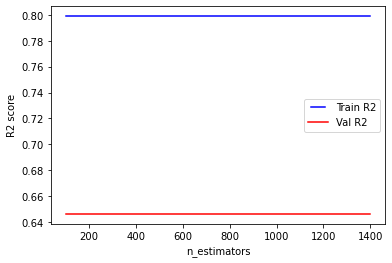

In [75]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

estimators = range(100, 1500, 100)
train_results_est = []
val_results_est = []

for n_estimators in estimators:
    XGB_test = XGBRegressor(
        loss='huber',
        learning_rate=0.01,
        n_estimators=600,
        subsample=0.9,
        min_samples_split=30,
        min_samples_leaf=6,
        max_depth=4,
        random_state=22,
        gamma=0.3,
    )
    XGB_test.fit(X_train, y_train)
    
    y_XGB_predtr = XGB_test.predict(X_train)
    y_XGB_predvl = XGB_test.predict(X_val)

    result_est_tr = r2_score(y_XGB_predtr, y_train)
    train_results_est.append(result_est_tr)
    result_est_vl = r2_score(y_XGB_predvl, y_val)
    val_results_est.append(result_est_vl)

line1, = plt.plot(estimators, train_results_est, "b", label='Train R2')
line2, = plt.plot(estimators, val_results_est, "r", label='Val R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("R2 score")
plt.xlabel("n_estimators")
plt.show()


In [77]:
# Assuming best_params_4 is a dictionary with the best hyperparameters
xgb_model = XGBRegressor(
    learning_rate=0.01,
    n_estimators=600,
    min_child_weight=1,  
    max_depth=5,  
    random_state=22,
)

# Fit the XGBoost model on the training data
xgb_model.fit(X_train, y_train)
# Assuming X_test is your test dataset
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the R-squared score on the test set
r2_xgb = r2_score(y_test, y_pred_xgb)



new_budget = 3.145 
new_popularity = 1.52  
new_runtime = 120  
new_release_year = 2025
new_vote_count=3.14
# Assuming new_features is a DataFrame with features like runtime, popularity, budget, and release_year
new_features = pd.DataFrame([[new_runtime, new_popularity, new_budget, new_release_year, new_vote_count]],
                             columns=['runtime', 'popularity', 'budget', 'release_year','vote_count'])

# Make predictions using the trained XGBoost model
predicted_revenue_xgb = xgb_model.predict(new_features)

print(f'Predicted Revenue using XGBoost: {predicted_revenue_xgb[0]}')


Predicted Revenue using XGBoost: 2.0045149326324463


In [78]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
XGB_test = XGBRegressor(
    learning_rate=0.1,
    n_estimators=150,
    random_state=22
)

results = cross_val_score(XGB_test, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean() * 100.0, results.std() * 100.0))


[0.71853849 0.68247696 0.77974915 0.755577   0.64084399 0.7548619
 0.72120639 0.73180061 0.63072074 0.81617664 0.75189953 0.75140906
 0.78006711 0.75901262 0.65847847 0.85707006 0.54765943 0.76891397
 0.82887915 0.70119391 0.79591842 0.63292698 0.61627844 0.82058604
 0.6683592  0.8271927  0.6800823  0.7182701  0.81721084 0.66434979
 0.76769624 0.72414372 0.7515873  0.85545722 0.70243473 0.79543603
 0.66925206 0.84400464 0.6810362  0.68382526 0.77380136 0.80951663
 0.77294818 0.62861176 0.75611819 0.65427336 0.70417274 0.75886635
 0.76894064 0.78025602]
Accuracy: 73.520% (6.928%)


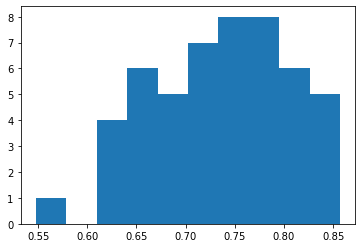

95.0 confidence interval 61.9% and 85.3%


In [79]:
from matplotlib import pyplot

pyplot.hist(results)
pyplot.show()

alpha = 0.95                             
p = ((1.0-alpha)/2.0) * 100             
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))